# Experimento 2: GroupByKey vs ReduceByKey.

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import glob, os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statistics

In [2]:
cd = os.getcwd()
log_directory = os.path.join(os.sep.join(cd.split(os.path.sep)[:-1]), 'output', 'logs')
log_files = glob.glob(os.path.join(log_directory, "*.csv"))
df = pd.concat(pd.read_csv(file, sep = ';') for file in log_files)
df = df.loc[df['App ID'].str.endswith('_test')]
df_app_ids = pd.DataFrame(df.drop_duplicates('App ID').reset_index (drop = True)[['App ID', 'App Name']])

In [3]:
group_by = df.loc[(df['Name'] == 'APPLICATION START') | (df['Name'] == 'APPLICATION END')].groupby('App ID')
execution_times = pd.DataFrame(group_by.agg({'Datetime': lambda x: list(x)})).reset_index(drop=False)
execution_times['Start'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['End'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['Total app execution time (s)'] = (execution_times['End'] - execution_times['Start']).apply(lambda x: x.total_seconds())
execution_times = execution_times[['App ID', 'Total app execution time (s)']]
execution_times = pd.merge(df_app_ids, execution_times).rename(columns = {'Datetime': 'Total app execution time (s)'})
execution_times['Size percentage'] = execution_times['App Name'].map(lambda x: int((x.split('_')[-2] + '0')[0:3]))
execution_times['Transformation'] = execution_times['App Name'].map(lambda x: x.split('_')[0])

In [4]:
execution_times['Group'] = execution_times['App Name'].map(lambda x: x.split('_')[1])
groupbykey_execution_times = execution_times.loc[execution_times['Transformation'] == 'GroupByKey']
groupbykey_execution_times_1 =  groupbykey_execution_times.loc[groupbykey_execution_times['Group'] == '1']
groupbykey_execution_times_2 =  groupbykey_execution_times.loc[groupbykey_execution_times['Group'] == '2']
reducebykey_execution_times = execution_times.loc[execution_times['Transformation'] == 'ReduceByKey']
reducebykey_execution_times_1 =  reducebykey_execution_times.loc[reducebykey_execution_times['Group'] == '1']
reducebykey_execution_times_2 =  reducebykey_execution_times.loc[reducebykey_execution_times['Group'] == '2']

## 1. Aplicación 1: Cálculo del número de registros de cada estación.

In [6]:
x_1 = groupbykey_execution_times_1['Size percentage']
y_1 = groupbykey_execution_times_1['Total app execution time (s)']
x_2 = reducebykey_execution_times_1['Size percentage']
y_2 = reducebykey_execution_times_1['Total app execution time (s)']

In [7]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = x_1, y =  y_1)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

print('============================== MODELO ===================================')

# Creación del modelo
modelo_1 = LinearRegression()
modelo_1.fit(X = x_1.array.reshape(-1,1), y = y_1)


# Información del modelo
print("Pendiente:", modelo_1.coef_.flatten()[0])
print("Coeficiente:", modelo_1.intercept_)
print('=========================================================================')
print("Coeficiente de determinación R^2:", modelo_1.score(x_1.array.reshape(-1,1), y_1))

Coeficiente de correlación de Pearson:  0.9928304414094211
P-value:  3.9799788486943585e-81
============================== MODELO ===================================
Pendiente: 3.2013088232533176
Coeficiente: 14.719332398897677
Coeficiente de determinación R^2: 0.9857122853892263


In [8]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = x_2, y =  y_2)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

print('============================== MODELO ===================================')

# Creación del modelo
modelo_2 = LinearRegression()
modelo_2.fit(X = x_2.array.reshape(-1,1), y = y_2)


# Información del modelo
print("Pendiente:", modelo_2.coef_.flatten()[0])
print("Coeficiente:", modelo_2.intercept_)
print('=========================================================================')
print("Coeficiente de determinación R^2:", modelo_2.score(x_2.array.reshape(-1,1), y_2))

Coeficiente de correlación de Pearson:  0.9922028878005676
P-value:  1.449592939588915e-79
============================== MODELO ===================================
Pendiente: 3.0721344960914765
Coeficiente: 12.604246455847203
Coeficiente de determinación R^2: 0.9844665705597855


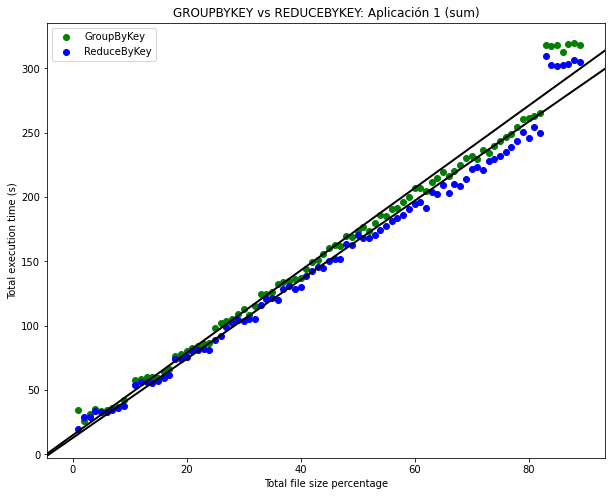

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(x_1, y_1, marker = 'o', color = 'green')
plt.scatter(x_2, y_2, marker = 'o', color = 'blue')

#legend
plt.legend({'GroupByKey','ReduceByKey'})

#regression
plt.axline((0,modelo_1.intercept_), slope=modelo_1.coef_.flatten()[0], color='black', linewidth=2)
plt.axline((0,modelo_2.intercept_), slope=modelo_2.coef_.flatten()[0], color='black', linewidth=2)

#axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

#title
plt.title('GROUPBYKEY vs REDUCEBYKEY: Aplicación 1 (sum)')

plt.show()

## 2. Aplicación 2: Temperatura mínima histórica por estación.

In [11]:
x_1 = groupbykey_execution_times_2['Size percentage']
y_1 = groupbykey_execution_times_2['Total app execution time (s)']
x_2 = reducebykey_execution_times_2['Size percentage']
y_2 = reducebykey_execution_times_2['Total app execution time (s)']

In [12]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = x_1, y =  y_1)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

print('============================== MODELO ===================================')

# Creación del modelo
modelo_1 = LinearRegression()
modelo_1.fit(X = x_1.array.reshape(-1,1), y = y_1)


# Información del modelo
print("Pendiente:", modelo_1.coef_.flatten()[0])
print("Coeficiente:", modelo_1.intercept_)
print('=========================================================================')
print("Coeficiente de determinación R^2:", modelo_1.score(x_1.array.reshape(-1,1), y_1))

Coeficiente de correlación de Pearson:  0.9902792648369559
P-value:  1.8278390698047778e-75
============================== MODELO ===================================
Pendiente: 2.422019933222597
Coeficiente: 18.44400416790596
Coeficiente de determinación R^2: 0.9806530223660221


In [13]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = x_2, y =  y_2)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

print('============================== MODELO ===================================')

# Creación del modelo
modelo_2 = LinearRegression()
modelo_2.fit(X = x_2.array.reshape(-1,1), y = y_2)


# Información del modelo
print("Pendiente:", modelo_2.coef_.flatten()[0])
print("Coeficiente:", modelo_2.intercept_)
print('=========================================================================')
print("Coeficiente de determinación R^2:", modelo_2.score(x_2.array.reshape(-1,1), y_2))

Coeficiente de correlación de Pearson:  0.9915648740851809
P-value:  4.2103883642783135e-78
============================== MODELO ===================================
Pendiente: 2.178953692371388
Coeficiente: 16.11040907927618
Coeficiente de determinación R^2: 0.9832008995195609


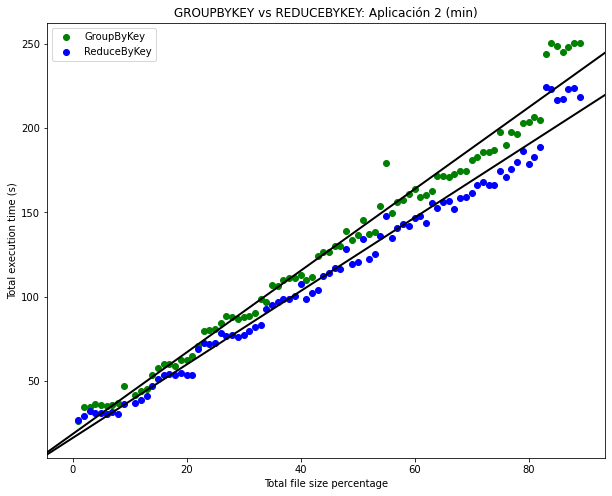

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(x_1, y_1, marker = 'o', color = 'green')
plt.scatter(x_2, y_2, marker = 'o', color = 'blue')

#legend
plt.legend({'GroupByKey','ReduceByKey'})

#regression
plt.axline((0,modelo_1.intercept_), slope=modelo_1.coef_.flatten()[0], color='black', linewidth=2)
plt.axline((0,modelo_2.intercept_), slope=modelo_2.coef_.flatten()[0], color='black', linewidth=2)

#axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

#title
plt.title('GROUPBYKEY vs REDUCEBYKEY: Aplicación 2 (min)')

plt.show()

## 3. Differences in shuffle Read and shuffle Write metrics

In [4]:
df['Size percentage'] = df['App Name'].map(lambda x: int(x.split('_')[-2]))
df['Transformation'] = df['App Name'].map(lambda x: x.split('_')[0])
df = df.loc[df['Size percentage'] <= 80]

In [5]:
df_shuffle_metrics = df.loc[(df['Transformation'] == 'GroupByKey') | (df['Transformation'] == 'ReduceByKey')]
df_shuffle_metrics['Size percentage'] = df_shuffle_metrics['App Name'].map(lambda x: int((x.split('_')[-2] + '0')[0:3]))
df_shuffle_metrics = df_shuffle_metrics.loc[(df_shuffle_metrics['SHUFFLER: Total Records Read'] != '-') | (df_shuffle_metrics['SHUFFLEW: Shuffle Records Written'] != '-')]
group_by = df_shuffle_metrics.groupby(['App ID', 'Size percentage', 'App Name', 'Transformation'])
group_by = pd.DataFrame(group_by.agg({'SHUFFLER: Total Records Read': lambda x: list(x), 'SHUFFLEW: Shuffle Records Written': lambda x: list(x)})).reset_index(drop=False)
group_by['SHUFFLER: Total Records Read'] = group_by['SHUFFLER: Total Records Read'].map(lambda x: [int(elem) for elem in x if elem != '0'])
group_by['SHUFFLEW: Shuffle Records Written'] = group_by['SHUFFLEW: Shuffle Records Written'].map(lambda x: [int(elem) for elem in x if elem != '0'])
group_by['Total_Read'] = group_by['SHUFFLER: Total Records Read'].map(lambda x: sum(x))
group_by['Total_Write'] = group_by['SHUFFLEW: Shuffle Records Written'].map(lambda x: sum(x))
group_by['Total_Write'] = group_by['SHUFFLER: Total Records Read'].map(lambda x: sum(x))
group_by['Aplication'] = group_by['App Name'].map(lambda x: int(x.split('_')[1]))
reduce = group_by.loc[group_by['Transformation'] == 'ReduceByKey']
group_by_reduce_1 = reduce.loc[reduce['Aplication'] == 1]
group_by_reduce_2 = reduce.loc[reduce['Aplication'] == 2]
group = group_by.loc[group_by['Transformation'] == 'GroupByKey']
group_by_group_1 = group.loc[group['Aplication'] == 1]
group_by_group_2 = group.loc[group['Aplication'] == 2]

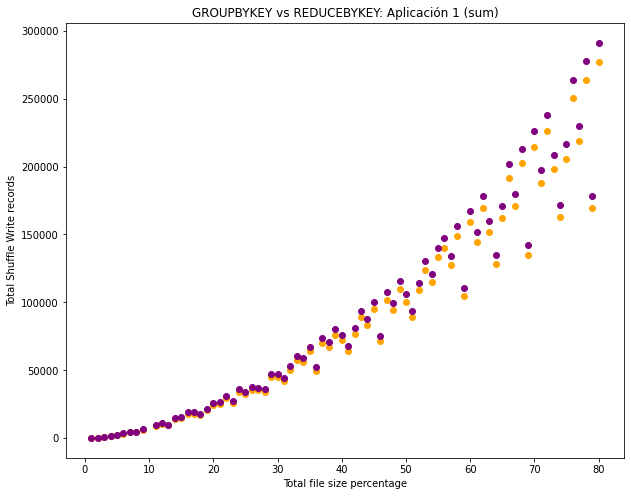

In [16]:
x_1 = group_by_reduce_1['Size percentage']
y_1 = group_by_reduce_1['Total_Read']
x_2 = group_by_group_1['Size percentage']
y_2 = group_by_group_1['Total_Read']

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x_1, y_1, marker = 'o', color = 'orange')
plt.scatter(x_2, y_2, marker = 'o', color = 'purple')

# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total Shuffle Write records')

# giving a title to my graph
plt.title('GROUPBYKEY vs REDUCEBYKEY: Aplicación 1 (sum)')

# function to show the plot
plt.show()

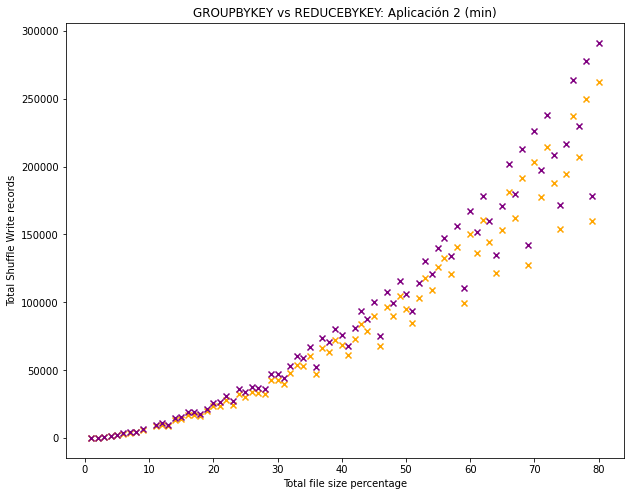

In [15]:
x_3 = group_by_reduce_2['Size percentage']
y_3 = group_by_reduce_2['Total_Read']
x_4 = group_by_group_2['Size percentage']
y_4 = group_by_group_2['Total_Read']

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x_3, y_3, marker = 'x', color = 'orange')
plt.scatter(x_4, y_4, marker = 'x', color = 'purple')

# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total Shuffle Write records')

# giving a title to my graph
plt.title('GROUPBYKEY vs REDUCEBYKEY: Aplicación 2 (min)')

# function to show the plot
plt.show()

---